In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class icaDemo:
    def __init__(self,N):
        self.N = N
    def remmean(self,sig):
        newVec = np.zeros(sig.shape)
        meanVal = np.mean(sig,axis=1)
        newVec = sig-np.transpose(np.tile(meanVal,(self.N,1)))
        return newVec, meanVal
    def demoSig(self):
        v = np.linspace(0,self.N-1,self.N)
        sinArr = np.sin(v/2); s1 = np.std(sinArr)
        funArr = ((np.remainder(v,23)-11)/9)**5; s2 = np.std(funArr)
        sawtooth = (np.remainder(v,27)-13)/9; s3 = np.std(sawtooth)
        uni = np.random.uniform(0,1,self.N)
        impul = ((uni<.5)*2-1)*np.log(uni); s4 = np.std(impul)
        sig = np.vstack((sinArr/s1,funArr/s2,sawtooth/s3,impul/s4))
        sig, mean = self.remmean(sig)
        Aorig = np.random.uniform(0,1,(sig.shape[0],sig.shape[0]))
        mixedsig = np.matmul(Aorig,sig)
        return sig, mixedsig
    def fastica(self,mixedsig):
        mixedsig,mixedmean = self.remmean(mixedsig)
        Dim, NumOfSample = mixedsig.shape

In [3]:
demo = icaDemo(500)
sigTrue, mixedsig = demo.demoSig()

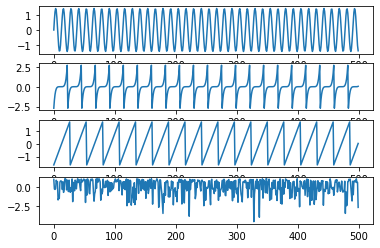

In [4]:
plt.subplot(4,1,1); plt.plot(sigTrue[0,:500])
plt.subplot(4,1,2); plt.plot(sigTrue[1,:500])
plt.subplot(4,1,3); plt.plot(sigTrue[2,:500])
plt.subplot(4,1,4); plt.plot(sigTrue[3,:500])

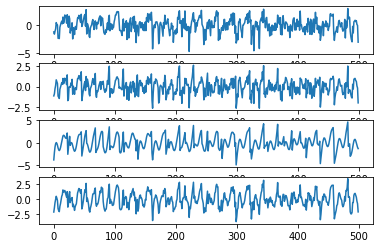

In [5]:
plt.subplot(4,1,1); plt.plot(mixedsig[0,:500])
plt.subplot(4,1,2); plt.plot(mixedsig[1,:500])
plt.subplot(4,1,3); plt.plot(mixedsig[2,:500])
plt.subplot(4,1,4); plt.plot(mixedsig[3,:500])

### Indepedent Component Analysis